
Training for n1=1, n2=1
Early stopping at epoch 25
Run 1: Best Training Loss: 0.6893040259294959, Best Validation Loss: 0.6896222499923816, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 22
Run 2: Best Training Loss: 0.6894060659868593, Best Validation Loss: 0.6898096669860219, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 104
Run 3: Best Training Loss: 0.6892693508179488, Best Validation Loss: 0.6895949897986173, Misclassification Error (Test): 0.39636363636363636

Training for n1=1, n2=2
Early stopping at epoch 92
Run 1: Best Training Loss: 0.6895052274381627, Best Validation Loss: 0.6897650707111483, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 39
Run 2: Best Training Loss: 0.6892657468069319, Best Validation Loss: 0.6895912326468786, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 33
Run 3: Best Training Loss: 0.6892979314721265, Best Validation Loss: 0.68961285582

Early stopping at epoch 34
Run 3: Best Training Loss: 0.6894478252992187, Best Validation Loss: 0.6897212591614569, Misclassification Error (Test): 0.39636363636363636

Training for n1=3, n2=4
Early stopping at epoch 34
Run 1: Best Training Loss: 0.6894371270773055, Best Validation Loss: 0.6898213160233936, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 29
Run 2: Best Training Loss: 0.6894117342557359, Best Validation Loss: 0.6897162656290585, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 27
Run 3: Best Training Loss: 0.6894453449039676, Best Validation Loss: 0.6898149762874128, Misclassification Error (Test): 0.39636363636363636

Training for n1=3, n2=5
Early stopping at epoch 27
Run 1: Best Training Loss: 0.689892981382161, Best Validation Loss: 0.690222197536311, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 25
Run 2: Best Training Loss: 0.6900356303558334, Best Validation Loss: 0.69048734343770

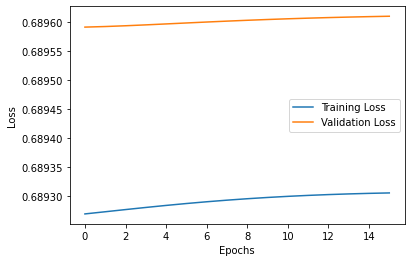


Training Misclassification Error: 0.45592705167173253
Validation Misclassification Error: 0.45785876993166286
Test Misclassification Error: 0.39636363636363636
Model weights: {'hidden_L1_weights': array([[0.61067514],
       [0.48035671],
       [0.02209547],
       [0.22800403]]), 'hidden_L2_weights': array([[-0.38226279, -0.01171736]]), 'output_layer_weights': array([[ 0.33447926],
       [-0.6200422 ]])}


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def initialize_weights(input_dim, n1, n2, random_state):
    hidden_L1_weights = 2 * np.random.rand(input_dim, n1) - 1
    hidden_L2_weights = 2 * np.random.rand(n1, n2) - 1
    output_layer_weights = 2 * np.random.rand(n2, 1) - 1
    return hidden_L1_weights, hidden_L2_weights, output_layer_weights

def forward_propagation(X, hidden_L1_weights, hidden_L2_weights, output_layer_weights):
    hidden_L1_output = sigmoid(np.dot(X, hidden_L1_weights))
    hidden_L2_output = sigmoid(np.dot(hidden_L1_output, hidden_L2_weights))
    output = sigmoid(np.dot(hidden_L2_output, output_layer_weights))
    return hidden_L1_output, hidden_L2_output, output

def compute_loss(y, output):
    loss = -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))
    return loss

def backpropagation(X_train, y_train, hidden_L1_weights, hidden_L2_weights, output_layer_weights, learning_rate):
    hidden_L1_output, hidden_L2_output, output = forward_propagation(X_train, hidden_L1_weights, hidden_L2_weights, output_layer_weights)

    output_error = y_train.reshape(-1, 1) - output
    output_delta = output_error * sigmoid_derivative(output)

    hidden_L2_error = output_delta.dot(output_layer_weights.T)
    hidden_L2_delta = hidden_L2_error * sigmoid_derivative(hidden_L2_output)

    hidden_L1_error = hidden_L2_delta.dot(hidden_L2_weights.T)
    hidden_L1_delta = hidden_L1_error * sigmoid_derivative(hidden_L1_output)

    output_layer_weights += hidden_L2_output.T.dot(output_delta) * learning_rate
    hidden_L2_weights += hidden_L1_output.T.dot(hidden_L2_delta) * learning_rate
    hidden_L1_weights += X_train.T.dot(hidden_L1_delta) * learning_rate

    return hidden_L1_weights, hidden_L2_weights, output_layer_weights

def train_neural_network(X_train, y_train, X_validation, y_validation, hidden_L1_weights, hidden_L2_weights, output_layer_weights, learning_rate, epochs, early_stopping_patience):
    training_loss_values = []
    validation_loss_values = []
    
    best_validation_loss = float('inf')
    patience = 0
    optimal_weights = None

    for epoch in range(epochs):
        hidden_L1_weights, hidden_L2_weights, output_layer_weights = backpropagation(X_train, y_train, hidden_L1_weights, hidden_L2_weights, output_layer_weights, learning_rate)

        hidden_L1_output_val, hidden_L2_output_val, output_val = forward_propagation(X_validation, hidden_L1_weights, hidden_L2_weights, output_layer_weights)

        training_loss = compute_loss(y_train, forward_propagation(X_train, hidden_L1_weights, hidden_L2_weights, output_layer_weights)[-1])
        training_loss_values.append(training_loss)

        validation_loss = compute_loss(y_validation, output_val)
        validation_loss_values.append(validation_loss)

        if validation_loss < best_validation_loss:
            optimal_weights = {
                'hidden_L1_weights': hidden_L1_weights.copy(),
                'hidden_L2_weights': hidden_L2_weights.copy(),
                'output_layer_weights': output_layer_weights.copy()
            }
            best_validation_loss = validation_loss
            best_training_loss = training_loss
            patience = 0
        else:
            patience += 1
            if patience >= early_stopping_patience:
                print(f'Early stopping at epoch {epoch}')
                break

    return optimal_weights, best_training_loss, best_validation_loss, training_loss_values, validation_loss_values

def test_neural_network(X, y, optimal_weights):
    hidden_L1_output, hidden_L2_output, output = forward_propagation(X, optimal_weights['hidden_L1_weights'], optimal_weights['hidden_L2_weights'], optimal_weights['output_layer_weights'])
    test_predictions = (output > 0.5).astype(int)
    misclassification_error = np.mean(test_predictions.flatten() != y)
    return misclassification_error

def main():
    # Loading the dataset
    data = pd.read_csv('data_banknote_authentication.txt', header=None, names=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Class'])
    X = data.iloc[:, :4].values
    y = data.iloc[:, 4].values

    random_state = 2782  # Last 4 digits of student number
    np.random.seed(random_state)
    
    learning_rate = 0.005
    epochs = 150
    early_stopping_patience = 15
    max_hidden_units = 8

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.4, random_state=random_state)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_validation = scaler.transform(X_validation)
    X_test = scaler.transform(X_test)

    # Initialize optimization parameters
    optimized_n1 = None
    optimized_n2 = None
    optimized_weights = None
    optimized_validation_loss = float('inf')
    optimized_misclassification_error = float('inf')

    for n1 in range(1, max_hidden_units):
        for n2 in range(1, max_hidden_units - n1 + 1):
            print(f'\nTraining for n1={n1}, n2={n2}')
            optimal_weights_list = []
            best_training_loss_list = []
            best_validation_loss_list = []
            misclassification_error_test_list = []

            for run in range(3):  # Run at least three times with different initial weights
                input_dim = X_train.shape[1]
                hidden_L1_weights, hidden_L2_weights, output_layer_weights = initialize_weights(input_dim, n1, n2, random_state + run)

                optimal_weights, best_training_loss, best_validation_loss, training_loss_values, validation_loss_values = train_neural_network(X_train, y_train, X_validation, y_validation, hidden_L1_weights, hidden_L2_weights, output_layer_weights, learning_rate, epochs, early_stopping_patience)
                misclassification_error_test = test_neural_network(X_test, y_test, optimal_weights)

                optimal_weights_list.append(optimal_weights)
                best_training_loss_list.append(best_training_loss)
                best_validation_loss_list.append(best_validation_loss)
                misclassification_error_test_list.append(misclassification_error_test)

                print(f'Run {run + 1}: Best Training Loss: {best_training_loss}, Best Validation Loss: {best_validation_loss}, Misclassification Error (Test): {misclassification_error_test}')

            # Choose the best initialization for this network configuration
            best_index = np.argmin(best_validation_loss_list)
            if best_validation_loss_list[best_index] < optimized_validation_loss:
                optimized_n1 = n1
                optimized_n2 = n2
                optimized_weights = optimal_weights_list[best_index]
                optimized_validation_loss = best_validation_loss_list[best_index]
                optimized_misclassification_error = misclassification_error_test_list[best_index]

    # Print and plot results for the best network
    print(f'\nBest Network Configuration: n1={optimized_n1}, n2={optimized_n2}')
    print(f'Best Validation Loss: {optimized_validation_loss}')
    print(f'Best Training Loss: {best_training_loss_list[best_index]}')
    print(f'Best Misclassification Error (Test): {optimized_misclassification_error}')

    # Extract loss values during training and validation from your training loop
    best_training_loss_values, best_validation_loss_values = train_neural_network(X_train, y_train, X_validation, y_validation, optimized_weights['hidden_L1_weights'], optimized_weights['hidden_L2_weights'], optimized_weights['output_layer_weights'], learning_rate, epochs, early_stopping_patience)[3:5]

    # Plotting learning curves for the best network
    plt.plot(best_training_loss_values, label='Training Loss')
    plt.plot(best_validation_loss_values, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate misclassification error for the final model
    final_model_misclassification_error_train = test_neural_network(X_train, y_train, optimized_weights)
    final_model_misclassification_error_validation = test_neural_network(X_validation, y_validation, optimized_weights)
    final_model_misclassification_error_test = test_neural_network(X_test, y_test, optimized_weights)

    print(f'\nTraining Misclassification Error: {final_model_misclassification_error_train}')
    print(f'Validation Misclassification Error: {final_model_misclassification_error_validation}')
    print(f'Test Misclassification Error: {final_model_misclassification_error_test}')
    print(f'Model weights: {optimized_weights}')

if __name__ == '__main__':
    main()




Training for n1=1, n2=1
Early stopping at epoch 26
Run 1: Best Training Loss: 0.6893040259294959, Best Validation Loss: 0.6896222499923816, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 87
Run 2: Best Training Loss: 0.6892988924091249, Best Validation Loss: 0.6896200069694273, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 53
Run 3: Best Training Loss: 0.689284966219207, Best Validation Loss: 0.6896082749721109, Misclassification Error (Test): 0.39636363636363636

Training for n1=1, n2=2
Early stopping at epoch 21
Run 1: Best Training Loss: 0.68926910832832, Best Validation Loss: 0.6895918794386081, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 54
Run 2: Best Training Loss: 0.6893218925369369, Best Validation Loss: 0.6896426096567834, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 37
Run 3: Best Training Loss: 0.6892907144768086, Best Validation Loss: 0.689618433175793

Early stopping at epoch 26
Run 1: Best Training Loss: 0.6900773517822494, Best Validation Loss: 0.6903778787070626, Misclassification Error (Test): 0.36363636363636365
Early stopping at epoch 29
Run 2: Best Training Loss: 0.6897016373274646, Best Validation Loss: 0.6899711812213902, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 33
Run 3: Best Training Loss: 0.6894999276067098, Best Validation Loss: 0.689800975018447, Misclassification Error (Test): 0.39636363636363636

Training for n1=3, n2=5
Early stopping at epoch 18
Run 1: Best Training Loss: 0.6895649651389946, Best Validation Loss: 0.6899182884286494, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 29
Run 2: Best Training Loss: 0.6897423574136831, Best Validation Loss: 0.6899688470107216, Misclassification Error (Test): 0.39636363636363636
Early stopping at epoch 22
Run 3: Best Training Loss: 0.6916873377686955, Best Validation Loss: 0.6919613265218041, Misclassification Er

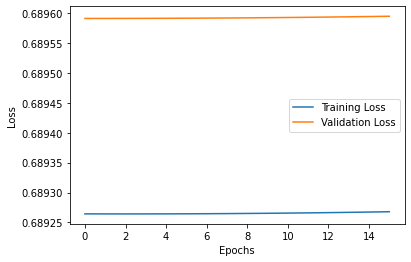


Final Model Misclassification Error (Train): 0.45592705167173253
Final Model Misclassification Error (Validation): 0.45785876993166286
Final Model Misclassification Error (Test): 0.39636363636363636
Final Model weights: {'hidden_layer1_weights': array([[-0.96792761],
       [ 0.98925352],
       [-0.62533512],
       [ 0.20527398]]), 'hidden_layer2_weights': array([[ 8.55516500e-01,  8.30306052e-04, -6.94698834e-02,
         4.28529108e-01, -3.84433230e-01]]), 'output_layer_weights': array([[-0.01097551],
       [-1.02964219],
       [ 0.53528221],
       [ 0.23070648],
       [-0.08545835]])}


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def load_data(file_path):
    data = pd.read_csv(file_path, header=None, names=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Class'])
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y

def split_data(X, y, test_size, validation_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size, random_state=random_state)
    return X_train, y_train, X_validation, y_validation, X_test, y_test
    
def standardize_data(X_train, X_validation, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_validation = scaler.transform(X_validation)
    X_test = scaler.transform(X_test)
    return X_train, X_validation, X_test

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def initialize_weights(input_dim, n1, n2, random_state):
    np.random.seed(random_state)
    hidden_layer1_weights = 2 * np.random.rand(input_dim, n1) - 1
    hidden_layer2_weights = 2 * np.random.rand(n1, n2) - 1
    output_layer_weights = 2 * np.random.rand(n2, 1) - 1
    return hidden_layer1_weights, hidden_layer2_weights, output_layer_weights
   
def forward_propagation(X, hidden_layer1_weights, hidden_layer2_weights, output_layer_weights):
    hidden_layer1_output = sigmoid(np.dot(X, hidden_layer1_weights))
    hidden_layer2_output = sigmoid(np.dot(hidden_layer1_output, hidden_layer2_weights))
    output = sigmoid(np.dot(hidden_layer2_output, output_layer_weights))
    return hidden_layer1_output, hidden_layer2_output, output

def compute_loss(y, output):
    loss = -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))
    return loss

def train_neural_network_with_loss_collection(X_train, y_train, X_validation, y_validation, hidden_layer1_weights,
                                              hidden_layer2_weights, output_layer_weights, learning_rate, epochs,
                                              early_stopping_patience):
    training_loss_values = []
    validation_loss_values = []
    
    best_validation_loss = float('inf')
    patience = 0
    best_weights = None

    for epoch in range(epochs):
        hidden_layer1_output, hidden_layer2_output, output = forward_propagation(X_train, hidden_layer1_weights, hidden_layer2_weights, output_layer_weights)

        training_loss = compute_loss(y_train, output)
        training_loss_values.append(training_loss)

        hidden_layer1_output_val, hidden_layer2_output_val, output_val = forward_propagation(X_validation, hidden_layer1_weights, hidden_layer2_weights, output_layer_weights)
        validation_loss = compute_loss(y_validation, output_val)
        validation_loss_values.append(validation_loss)

        if validation_loss < best_validation_loss:
            best_weights = {
                'hidden_layer1_weights': hidden_layer1_weights.copy(),
                'hidden_layer2_weights': hidden_layer2_weights.copy(),
                'output_layer_weights': output_layer_weights.copy()
            }
            best_validation_loss = validation_loss
            best_training_loss = training_loss
            patience = 0
        else:
            patience += 1
            if patience >= early_stopping_patience:
                print(f'Early stopping at epoch {epoch}')
                break

        output_error = y_train.reshape(-1, 1) - output
        output_delta = output_error * sigmoid_derivative(output)

        hidden_layer2_error = output_delta.dot(output_layer_weights.T)
        hidden_layer2_delta = hidden_layer2_error * sigmoid_derivative(hidden_layer2_output)

        hidden_layer1_error = hidden_layer2_delta.dot(hidden_layer2_weights.T)
        hidden_layer1_delta = hidden_layer1_error * sigmoid_derivative(hidden_layer1_output)

        output_layer_weights += hidden_layer2_output.T.dot(output_delta) * learning_rate
        hidden_layer2_weights += hidden_layer1_output.T.dot(hidden_layer2_delta) * learning_rate
        hidden_layer1_weights += X_train.T.dot(hidden_layer1_delta) * learning_rate

    return best_weights, best_training_loss, best_validation_loss, training_loss_values, validation_loss_values


def test_neural_network(X, y, best_weights):
    hidden_layer1_output, hidden_layer2_output, output = forward_propagation(X, best_weights['hidden_layer1_weights'], best_weights['hidden_layer2_weights'], best_weights['output_layer_weights'])
    test_predictions = (output > 0.5).astype(int)
    misclassification_error = np.mean(test_predictions.flatten() != y)
    return misclassification_error

def plot_learning_curves(training_loss, validation_loss):
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    #plt.ylim(0.688, 0.69)  # Set y-axis limits
    plt.legend()
    plt.show()

def main():
    file_path = 'data_banknote_authentication.txt'
    test_size = 0.2
    validation_size = 0.4
    random_state = 2782  
    learning_rate = 0.005
    #learning_rate = 0.01
    epochs = 100
    early_stopping_patience = 15   #allows model to stop earlier if validation loss stops decreasing
    max_hidden_units = 8    #set to ensure that n1 + n2 does not exceed 8

    best_network = {
        'n1': None,
        'n2': None,
        'best_weights': None,
        'best_validation_loss': float('inf'),
        'best_misclassification_error': float('inf')
    }

    for n1 in range(1, max_hidden_units):
        for n2 in range(1, max_hidden_units - n1 + 1):
            print(f'\nTraining for n1={n1}, n2={n2}')
            best_weights_list = []
            best_training_loss_list = []
            best_validation_loss_list = []
            misclassification_error_test_list = []

            for run in range(3):  # Run at least three times with different initial weights
                X, y = load_data(file_path)
                X_train, y_train, X_validation, y_validation, X_test, y_test = split_data(X, y, test_size, validation_size, random_state)
                X_train, X_validation, X_test = standardize_data(X_train, X_validation, X_test)
                input_dim = X_train.shape[1]
                hidden_layer1_weights, hidden_layer2_weights, output_layer_weights = initialize_weights(input_dim, n1, n2, random_state + run)

                best_weights, best_training_loss, best_validation_loss, training_loss_values, validation_loss_values = train_neural_network_with_loss_collection(X_train, y_train, X_validation, y_validation, hidden_layer1_weights, hidden_layer2_weights, output_layer_weights, learning_rate, epochs, early_stopping_patience)
                misclassification_error_test = test_neural_network(X_test, y_test, best_weights)

                best_weights_list.append(best_weights)
                best_training_loss_list.append(best_training_loss)
                best_validation_loss_list.append(best_validation_loss)
                misclassification_error_test_list.append(misclassification_error_test)

                print(f'Run {run + 1}: Best Training Loss: {best_training_loss}, Best Validation Loss: {best_validation_loss}, Misclassification Error (Test): {misclassification_error_test}')

            # Choose the best initialization for this network configuration
            best_index = np.argmin(best_validation_loss_list)
            if best_validation_loss_list[best_index] < best_network['best_validation_loss']:
                best_network['n1'] = n1
                best_network['n2'] = n2
                best_network['best_weights'] = best_weights_list[best_index]
                best_network['best_training_loss'] = best_training_loss_list[best_index]
                best_network['best_validation_loss'] = best_validation_loss_list[best_index]
                best_network['best_misclassification_error'] = misclassification_error_test_list[best_index]

    # Print and plot results for the best network
    print(f'\nBest Network Configuration: n1={best_network["n1"]}, n2={best_network["n2"]}')
    print(f'Best Validation Loss: {best_network["best_validation_loss"]}')
    print(f'Best Training Loss: {best_network["best_training_loss"]}')
    print(f'Best Misclassification Error (Test): {best_network["best_misclassification_error"]}')

    # Extract loss values during training and validation from your training loop
    best_weights = best_network['best_weights']
    best_training_loss_values, best_validation_loss_values = train_neural_network_with_loss_collection(X_train, y_train, X_validation, y_validation, best_weights['hidden_layer1_weights'], best_weights['hidden_layer2_weights'], best_weights['output_layer_weights'], learning_rate, epochs, early_stopping_patience)[-2:]

    # Plot learning curves for the best network
    #plot_learning_curves(training_loss_values, validation_loss_values)
    plot_learning_curves(best_training_loss_values, best_validation_loss_values)

    # Evaluate misclassification error for the final model
    final_model_misclassification_error_train = test_neural_network(X_train, y_train, best_weights)
    final_model_misclassification_error_validation = test_neural_network(X_validation, y_validation, best_weights)
    final_model_misclassification_error_test = test_neural_network(X_test, y_test, best_weights)

    print(f'\nFinal Model Misclassification Error (Train): {final_model_misclassification_error_train}')
    print(f'Final Model Misclassification Error (Validation): {final_model_misclassification_error_validation}')
    print(f'Final Model Misclassification Error (Test): {final_model_misclassification_error_test}')
    print(f'Final Model weights: {best_weights}')

if __name__ == '__main__':
    main()